In [1]:
!pip install opencv-python pixellib

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 10.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.3/430.3 kB 10.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 M

In [2]:
# cv2: OpenCV 라이브러리로, 실시간 컴퓨터 비전을 목적으로 한 프로그래밍 라이브러리
# numpy(NumPy): 행렬이나 대규모 다차원 배열을 쉽게 처리할 수 있도록 지원하는 라이브러리. 데이터 구조 외에도 수치 계산을 위해 효율적으로 구현된 기능을 제공
# torch: PyTorch. 딥러닝 및 텐서 연산을 위한 라이브러리. 인공지능 모델을 만들거나 불러와 추론하는 도구
# torchvision: 이미지 변환 및 전처리를 위한 torchvision의 transform 모듈
# deeplabv3_resnet101: 사전 학습된 DeepLabV3 모델. 이미지를 분류하도록 학습된 모델
# matplotlib: 파이썬 프로그래밍 언어 및 수학적 확장 NumPy 라이브러리를 활용한 플로팅 라이브러리로, 데이터 시각화 도구

import cv2
import os
import numpy as np
import torch
import torchvision.transforms as T
from torchvision.models.segmentation import deeplabv3_resnet101
import matplotlib.pyplot as plt

print('슝=3')

슝=3


이미지 크기: (450, 800, 3)


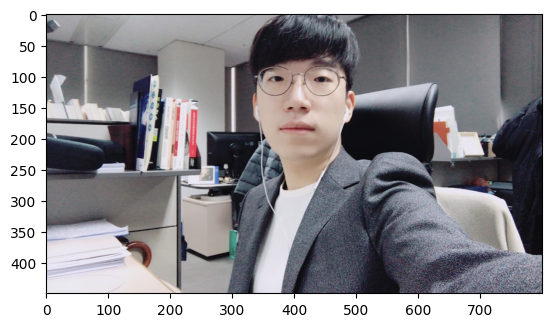

In [3]:
# 준비한 이미지 파일의 경로를 이용하여, 이미지 파일을 읽음
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장

home_dir = os.getenv('HOME')
img_path = os.path.join(home_dir, "Projects/AIFFEL_quest_eng/Computer_Vision/CV02/human_segmentation/images/my_image.png")
img_orig = cv2.imread(img_path)

print(f"이미지 크기: {img_orig.shape}")

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
# plt.show(): 현재 열려있는 모든 figure를 표시 (여기서 figure는 이미지, 그래프 등)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
model = deeplabv3_resnet101(pretrained=True).eval()

/Users/jamesyang/.pyenv/versions/3.12.2/envs/aipel/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/jamesyang/.pyenv/versions/3.12.2/envs/aipel/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /Users/jamesyang/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth


100%|██████████| 233M/233M [00:20<00:00, 11.8MB/s] 


In [ ]:

#  DeepLabV3때문에 크기축소...
transform = T.Compose([
    T.ToPILImage(),
    T.Resize((520, 520)),  # 모델 입력 크기 (고정)
    T.ToTensor(),
])

In [ ]:

# img_orig (BGR NumPy 배열)
# cv2.cvtColor 적용 -> (RGB NumPy 배열)
# transform 시작
# T.ToPILImage() 실행 -> (여기서 PIL 이미지로 변신!)
# T.Resize 실행 -> (PIL 이미지 크기 조절)
# T.ToTensor 실행 -> (다시 PyTorch용 텐서로 변신)
# transform 완료

input_tensor = transform(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)).unsqueeze(0)

In [ ]:
%%time
with torch.no_grad():
    output = model(input_tensor)["out"][0] # 결과 데이타 추출
    argmax(0) (가장 핵심!):
    # 모델은 각 픽셀 하나하나에 대해 21개 클래스(배경, 사람, 강아지 등)의 점수를 줍니다. (예: [배경: 0.1, 사람: 0.8, 강아지: 0.1])
    # argmax(0)는 이 중 가장 높은 점수 하나(여기선 0.8인 '사람')의 번호만 딱 남깁니다. 즉, 점수표를 클래스 번호판으로 바꾸는 것입니다.
    # 판사(argmax): "자, 점수표를 보자. 사람 점수(80점)가 제일 높네? 그럼 이 자리는 이제부터 **'사람(ID: 15)'**으로 낙점한다!"
    # 이 과정에서 0.8이라는 점수는 사라지고, 오직 '우승자의 번호'인 15만 남게 됩니다.
    # .byte(): 0~20번 사이의 번호만 있으니, 큰 숫자 데이터 형식이 필요 없습니다. 아주 가벼운 byte 형식으로 바꿔서 용량을 줄입니다.
    # .cpu(): 만약 모델 계산을 그래픽카드(GPU)에서 했다면, 다음 작업을 위해 데이터의 위치를 **일반 메모리(CPU)**로 옮겨옵니다.
    # .numpy(): 마지막으로 PyTorch 전용 데이터(Tensor)를 파이썬의 표준 데이터 형식인 NumPy 배열로 바꾸면 끝납니다. 그래야 OpenCV나 Matplotlib에서 쓸 수 있거든요.
    output_predictions = output.argmax(0).byte().cpu().numpy()

# 원본 크기로 Resize
# interpolation=cv2.INTER_NEAREST: "가장 중요!"
# 여기가 이 코드의 핵심입니다. 보통 사진을 키울 때는 LINEAR나 CUBIC 같은 부드럽게 만드는 옵션을 쓰지만, 여기서는 **NEAREST**만 써야 합니다.
# 이유: 지금 이 데이터는 색깔이 아니라 **'정답 번호(0, 15 등)'**이기 때문입니다.
# 만약 부드럽게 키우는 옵션을 쓰면?
# 배경(0)과 사람(15) 사이 경계선이 7.5 같은 이상한 숫자로 섞여 버립니다. (세상에 7.5번 클래스는 없죠!)
# INTER_NEAREST를 쓰면:
# "주변에 0밖에 없네? 그럼 그냥 0으로 채워.", "주변에 15밖에 없네? 그럼 15로 채워."
# 이렇게 정수 번호를 깨뜨리지 않고 그대로 크기만 키워줍니다.
output_predictions_resized = cv2.resize(output_predictions, (img_orig.shape[1], img_orig.shape[0]), interpolation=cv2.INTER_NEAREST)

CPU times: user 1.37 s, sys: 448 ms, total: 1.82 s
Wall time: 557 ms


In [8]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

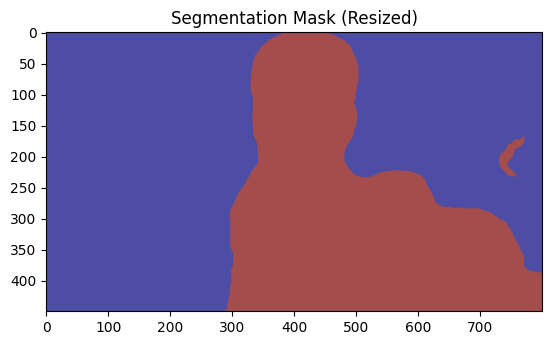

In [9]:
plt.imshow(output_predictions_resized, cmap="jet", alpha=0.7)
plt.title("Segmentation Mask (Resized)")
plt.show()

In [10]:
unique_classes = np.unique(output_predictions_resized)
unique_classes

array([ 0, 15], dtype=uint8)

In [11]:
for class_id in unique_classes:
    print(LABEL_NAMES[class_id])

background
person


In [12]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생성 코드 결과물이예요!

#컬러맵 만들기
colormap = np.zeros((256, 3), dtype=int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]  # 생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [13]:
colormap[15] #컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)

array([192, 128, 128])

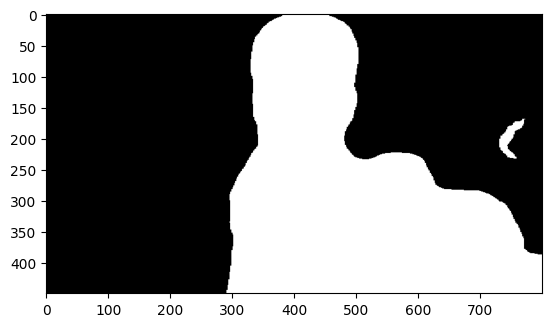

In [ ]:
# output의 픽셀 별로 예측된 class가 사람이라면 1(True), 다르다면 0(False)이 됩니다
# 1과 0에 각각 255를 곱하였으므로 사람으로 예측된 픽셀은 255, 그렇지 않은 픽셀은 0
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = (output_predictions_resized == 15)  # 클래스 ID 15 (사람)
# 이 줄 바로 윗줄에서 seg_map = (output_predictions_resized == 15)라고 하셨죠? 지금 seg_map 안에는 이런 데이터가 들어있습니다:
# 사람인 곳: True
# 배경인 곳: False

img_mask = seg_map.astype(np.uint8) * 255  # 255 값으로 변환
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 2. color_mask (색깔 지도)
# 값: cv2.applyColorMap을 거치면서 하나의 픽셀이 [R, G, B] 세 가지 숫자를 가지게 됩니다.
# 구조: 3층짜리 컬러 이미지 구조가 됩니다. (3D 행렬)
# 모습:
# 0이었던 곳 ➡️ 진한 파란색([128, 0, 0] - OpenCV 기준 BGR)
# 255였던 곳 ➡️ 진한 빨간색([0, 0, 255] - OpenCV 기준 BGR)
# 특징: JET라는 필터를 끼웠기 때문에 0은 파랑, 255는 빨강으로 자동 변신한 것입니다.

plt.imshow(img_mask, cmap='gray')  # 흑백으로 표시
plt.show()

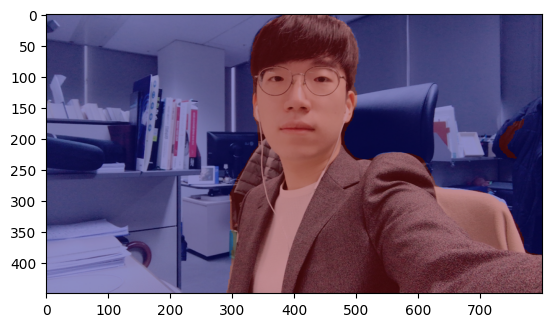

In [15]:
# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.

img_show = cv2.addWeighted(img_orig, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

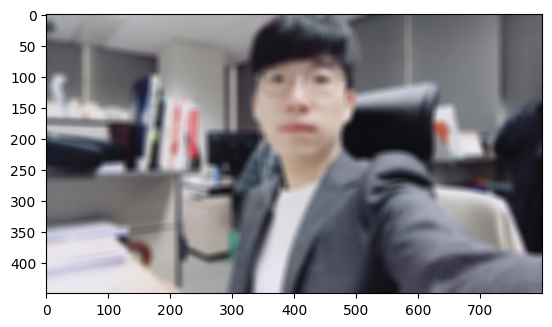

In [16]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (13, 13))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

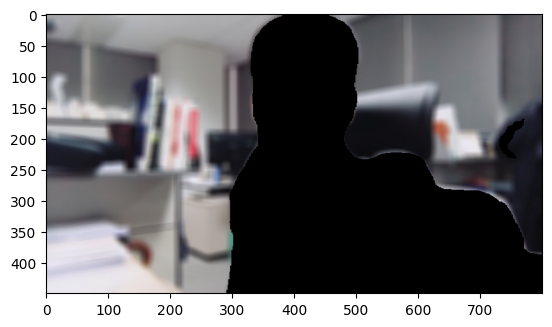

In [ ]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
# 변신 전 (img_mask): 채널이 1개입니다. 픽셀마다 숫자 하난만 있죠. (예: 255)
# 변신 후 (img_mask_color): 채널이 3개가 됩니다. 픽셀마다 숫자가 세 개씩 생깁니다. (예: [255, 255, 255])



# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
# 1. 사용된 재료
# img_orig_blur: 원본 사진 전체를 뭉개트려 놓은 흐릿한 사진.
# img_bg_mask: 방금 뒤집어서 만든 지도 (배경은 하얗고, 사람은 까만색).
# 2. cv2.bitwise_and(...)의 마법
# 이 함수는 두 이미지를 겹쳐서 둘 다 밝은 부분만 남기는 연산을 합니다. 수학적으로는 0을 곱하면 0이 되는 원리를 이용해요.

# 배경 영역: (흐릿한 배경) AND (하얀색: 255) ➡️ 흐릿한 배경이 그대로 남음!
# 사람 영역: (흐릿한 인물) AND (까만색: 0) ➡️ 까맣게 지워짐 (0)!

plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

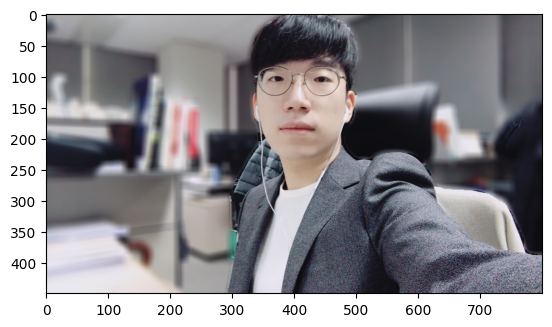

In [18]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

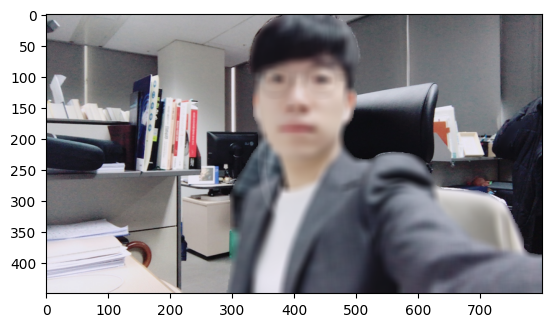

In [21]:
# Q. 이번에는 사람 부분을 블러로, 배경 부분을 원본으로 출력해볼까요?
# 힌트 : img_mask_color 옵션을 적절히 조정해주고, img_orig, img_orig_blur 를 활용하세요.
img_concat = np.where(img_mask_color == 255, img_orig_blur, img_orig)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()